<a href="https://colab.research.google.com/github/shrutibhosale185/Heart-Disease-Prediction/blob/main/Logistic_regression_Hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First Hypothesis:**
Increase in chances of having heart disease due to increase in age and cholesterol using logistic regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import (confusion_matrix, accuracy_score)
df = pd.read_csv("/content/heart_statlog_cleveland_hungary_final.csv")
df.columns = ['Age', 'Sex', 'ChestPT', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestECG', 'MaxHR','ExerciseInducedAnigna', 'St_depression', 'st_slope','HeartDisease']
df.head(25)

,Age,Sex,ChestPT,RestingBP,Cholesterol,FastingBS,RestECG,MaxHR,ExerciseInducedAnigna,St_depression,st_slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [ ]:
FirstHypo=df[['Age', 'Cholesterol']].groupby(df['HeartDisease']).describe().round(3)
FirstHypo

Age                                              Cholesterol  \
              count    mean    std   min   25%   50%   75%   max       count   
HeartDisease                                                                   
0             561.0  51.125  9.494  28.0  44.0  51.0  57.0  76.0       561.0   
1             629.0  56.035  8.605  31.0  51.0  57.0  62.0  77.0       629.0   

                                                                 
                 mean      std  min    25%    50%    75%    max  
HeartDisease                                                     
0             231.658   70.022  0.0  201.0  232.0  268.0  564.0  
1             191.372  119.735  0.0  126.0  226.0  274.0  603.0

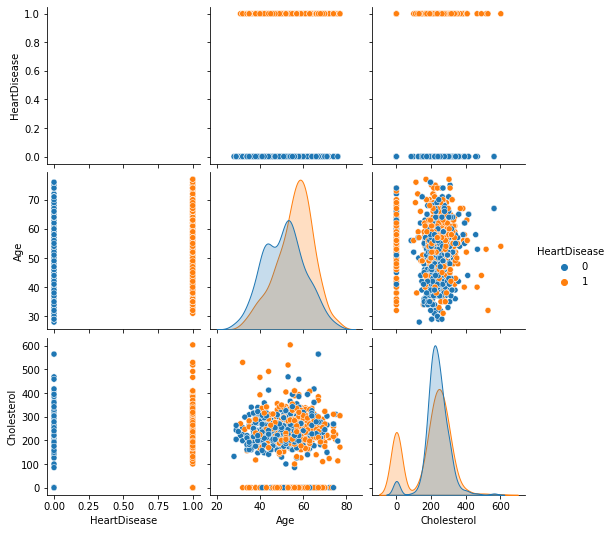

In [ ]:
sns.pairplot(df, vars = ['HeartDisease', 'Age', 'Cholesterol'], hue = 'HeartDisease')

In [ ]:
df['Chol_int'] = np.log(df['Cholesterol'])*df['Cholesterol']
df['Age_int'] = np.log(df['Age'])*df['Age']
df = df.dropna()
x_cont_first = df[['Cholesterol', 'Age', 'Chol_int', 'Age_int']]
x_cont_first = sm.add_constant(x_cont_first)
logit_assump_for_chol_age = sm.Logit(df['HeartDisease'], x_cont_first)
print(logit_assump_for_chol_age.fit().summary())

Optimization terminated successfully.
         Current function value: 0.648294
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                 1018
Model:                          Logit   Df Residuals:                     1013
Method:                           MLE   Df Model:                            4
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                 0.06203
Time:                        13:52:21   Log-Likelihood:                -659.96
converged:                       True   LL-Null:                       -703.61
Covariance Type:            nonrobust   LLR p-value:                 4.942e-18
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -8.1100      3.782     -2.144      0.032     -15.523      -0.697
Cholesterol     0.0134    

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
df[['Cholesterol', 'Age']].corr().round(3)

,Cholesterol,Age
Cholesterol,1.000,0.099
Age,0.099,1.000


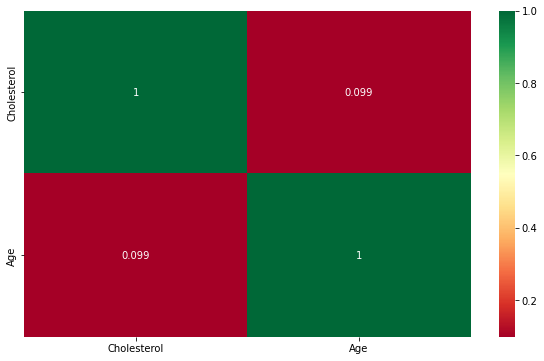

In [ ]:
plt.subplots(figsize=(10, 6))
corrMatrix_first = df[['Cholesterol', 'Age']].corr()
sns.heatmap(corrMatrix_first, annot = True, cmap="RdYlGn")

In [ ]:
x_first = df[['Age', 'Cholesterol']] 
x_first = sm.add_constant(x_first)
y_first = df['HeartDisease']
log_mdl = sm.Logit(df['HeartDisease'], x_first).fit()
print(log_mdl.summary2())
print("‘loglikelihood ratio:", log_mdl.llr.round(3))
print("p value:", log_mdl.llr_pvalue.round(3))

Optimization terminated successfully.
         Current function value: 0.648851
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.061     
Dependent Variable: HeartDisease     AIC:              1327.0616 
Date:               2022-04-13 13:52 BIC:              1341.8384 
No. Observations:   1018             Log-Likelihood:   -660.53   
Df Model:           2                LL-Null:          -703.61   
Df Residuals:       1015             LLR p-value:      1.9527e-19
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -4.1527    0.4852  -8.5595  0.0000  -5.1036  -3.2018
Age            0.0612    0.0074   8.2409  0.0000   0.0466   0.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print("* Odds ratio for Age:", np.exp(0.0612).round(3))
print("* Odds ratio for Chol:", np.exp(0.0031).round(3))
#-- 4% chances of having heart disease with every year person age rises
#-- .7% chance of having heart disease based on increase of cholesterol --- not mch change as there's good chol as well


* Odds ratio for Age: 1.063
* Odds ratio for Chol: 1.003


In [ ]:
y_pred_first = log_mdl.predict(x_first)
cm = confusion_matrix(y_first, y_pred_first.round())
print("Confusion Matrix : \n", cm)
print('Test accuracy = ', accuracy_score(y_first, y_pred_first.round()))

Confusion Matrix : 
 [[382 159]
 [196 281]]
Test accuracy =  0.6512770137524558


**Second Hypothesis**: Increase in chances of having heart disease due to changes in Resting Blood Pressure and Maximum Heart Rate using logistic regression

In [ ]:
SecondHypo=df[['RestingBP', 'MaxHR']].groupby(df['HeartDisease']).describe().round(3)
SecondHypo

RestingBP                                                      \
                 count     mean     std   min     25%    50%    75%    max   
HeartDisease                                                                 
0                390.0  130.164  16.137  94.0  120.00  130.0  140.0  190.0   
1                356.0  136.154  17.963  92.0  123.75  136.0  145.0  200.0   

              MaxHR                                                     
              count     mean     std   min    25%    50%    75%    max  
HeartDisease                                                            
0             390.0  149.059  23.112  69.0  135.0  150.5  167.0  202.0  
1             356.0  130.551  22.299  71.0  115.0  130.0  147.0  195.0

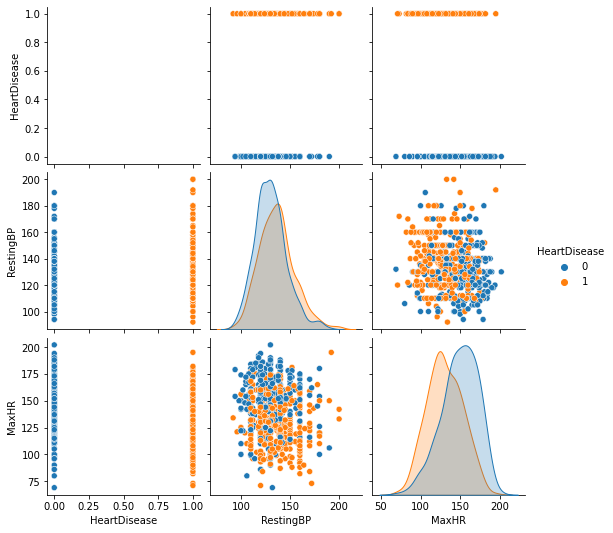

In [ ]:
sns.pairplot(df, vars = ['HeartDisease', 'RestingBP', 'MaxHR'], hue = 'HeartDisease')

In [ ]:
df['RBP_int'] = np.log(df['RestingBP'])*df['RestingBP']
df['MHR_int'] = np.log(df['MaxHR'])*df['MaxHR']
df = df.dropna()
x_cont_second = df[['RestingBP', 'MaxHR', 'RBP_int', 'MHR_int']]
x_cont_second = sm.add_constant(x_cont_second)
logit_assump_for_RBP_MHR = sm.Logit(df['HeartDisease'], x_cont_second)
print(logit_assump_for_RBP_MHR.fit().summary())

Optimization terminated successfully.
         Current function value: 0.603172
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                  746
Model:                          Logit   Df Residuals:                      741
Method:                           MLE   Df Model:                            4
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                  0.1285
Time:                        12:17:50   Log-Likelihood:                -449.97
converged:                       True   LL-Null:                       -516.31
Covariance Type:            nonrobust   LLR p-value:                 1.034e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1522      8.171     -0.875      0.381     -23.166       8.862
RestingBP     -0.0493      0.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
df[['RestingBP', 'MaxHR']].corr().round(3)

,RestingBP,MaxHR
RestingBP,1.000,-0.126
MaxHR,-0.126,1.000


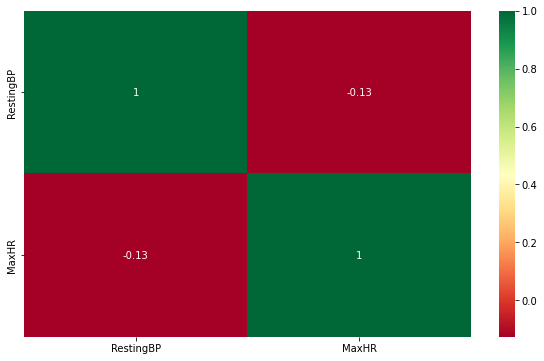

In [ ]:
plt.subplots(figsize=(10, 6))
corrMatrix_second = df[['RestingBP', 'MaxHR']].corr()
sns.heatmap(corrMatrix_second, annot = True, cmap="RdYlGn")

In [ ]:
x_second = df[['MaxHR', 'RestingBP']] 
x_second = sm.add_constant(x_second)
y_second = df['HeartDisease']
log_mdl = sm.Logit(df['HeartDisease'], x_second).fit()
print(log_mdl.summary2())
print("‘loglikelihood ratio:", log_mdl.llr.round(3))
print("p value:", log_mdl.llr_pvalue.round(3))

Optimization terminated successfully.
         Current function value: 0.607136
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.123     
Dependent Variable: HeartDisease     AIC:              911.8463  
Date:               2022-04-13 12:18 BIC:              925.6905  
No. Observations:   746              Log-Likelihood:   -452.92   
Df Model:           2                LL-Null:          -516.31   
Df Residuals:       743              LLR p-value:      2.9529e-28
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const          2.3252    0.8234   2.8240  0.0047   0.7114   3.9390
MaxHR         -0.0340    0.0036  -9.3759  0.0000  -0.0411  -0.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print("* Odds ratio for MaxHR:", np.exp(-0.0340).round(3))
print("* Odds ratio for RestingBP:", np.exp(0.0176).round(3))
#-- 4% chances of not having heart disease with every rise of heart rate..means heart is working strongly
#-- 1% chance of having heart disease based on increase of Resting BP --- not mch change 

* Odds ratio for MaxHR: 0.967
* Odds ratio for RestingBP: 1.018


In [ ]:
y_pred_second = log_mdl.predict(x_second)
cm = confusion_matrix(y_second, y_pred_second.round())
print("Confusion Matrix : \n", cm)
print('Test accuracy = ', accuracy_score(y_second, y_pred_second.round()))

Confusion Matrix : 
 [[280 110]
 [134 222]]
Test accuracy =  0.6729222520107239


**Third Hypothesis**: All 4 MaxHR RestingBP, Cholesterol & Age

In [ ]:
ThirdHypo=df[['RestingBP', 'MaxHR' ,'Age','Cholesterol']].groupby(df['HeartDisease']).describe().round(3)
ThirdHypo

RestingBP                                                     \
                 count     mean     std   min    25%    50%    75%    max   
HeartDisease                                                                
0                410.0  130.180  16.500  80.0  120.0  130.0  140.0  190.0   
1                508.0  134.185  19.829   0.0  120.0  132.0  145.0  200.0   

              MaxHR           ...   Age       Cholesterol                    \
              count     mean  ...   75%   max       count     mean      std   
HeartDisease                  ...                                             
0             410.0  148.151  ...  57.0  76.0       410.0  227.122   74.635   
1             508.0  127.656  ...  62.0  77.0       508.0  175.941  126.391   

                                                 
              min     25%    50%     75%    max  
HeartDisease                                     
0             0.0  197.25  227.0  266.75  564.0  
1             0.0    0.00  217.0  267.00  603.0  

[2 rows x 32 columns]

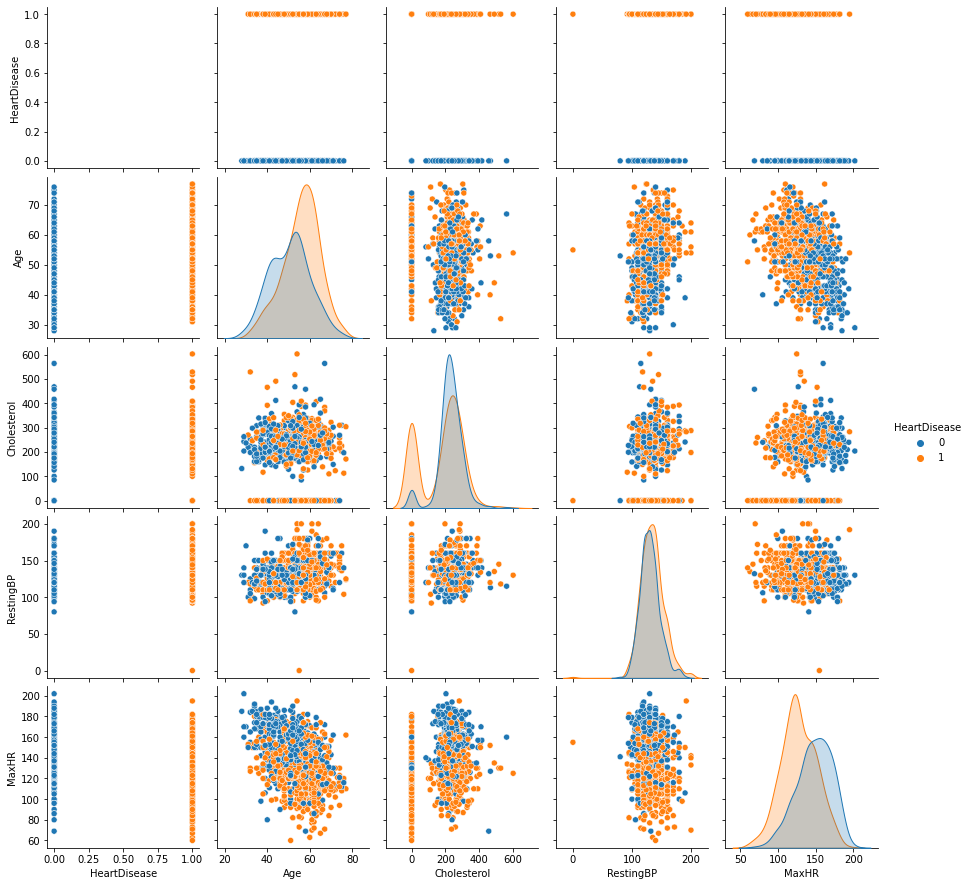

In [ ]:
sns.pairplot(df, vars = ['HeartDisease', 'Age', 'Cholesterol','RestingBP','MaxHR'], hue = 'HeartDisease')

In [ ]:
df['Chol_int'] = np.log(df['Cholesterol'])*df['Cholesterol']
df['Age_int'] = np.log(df['Age'])*df['Age']
df['RBP_int'] = np.log(df['RestingBP'])*df['RestingBP']
df['MHR_int'] = np.log(df['MaxHR'])*df['MaxHR']
df = df.dropna()
x_cont_third = df[['Cholesterol', 'Age','RestingBP', 'MaxHR', 'Chol_int', 'Age_int','RBP_int', 'MHR_int']]
x_cont_third = sm.add_constant(x_cont_third)
logit_assump_for_third = sm.Logit(df['HeartDisease'], x_cont_third)
print(logit_assump_for_third.fit().summary())


Optimization terminated successfully.
         Current function value: 0.587991
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                  746
Model:                          Logit   Df Residuals:                      737
Method:                           MLE   Df Model:                            8
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                  0.1504
Time:                        12:52:52   Log-Likelihood:                -438.64
converged:                       True   LL-Null:                       -516.31
Covariance Type:            nonrobust   LLR p-value:                 1.504e-29
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.5377      9.092     -0.719      0.472     -24.358      11.283
Cholesterol     0.0165    

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
df[['Cholesterol', 'Age','RestingBP','MaxHR']].corr().round(3)


,Cholesterol,Age,RestingBP,MaxHR
Cholesterol,1.000,0.059,0.096,-0.020
Age,0.059,1.000,0.260,-0.382
RestingBP,0.096,0.260,1.000,-0.126
MaxHR,-0.020,-0.382,-0.126,1.000


In [ ]:
[x*2 for x in range(1,5)]

[2, 4, 6, 8]

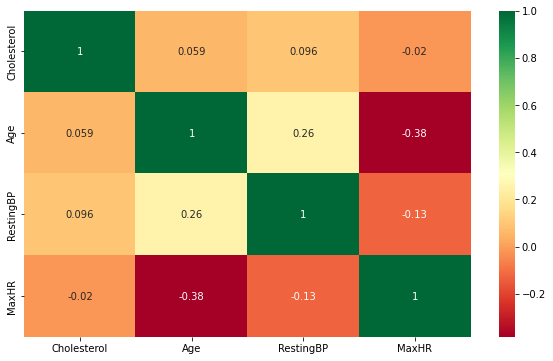

In [ ]:
plt.subplots(figsize=(10, 6))
corrMatrix_third= df[['Cholesterol', 'Age','RestingBP', 'MaxHR']].corr()
sns.heatmap(corrMatrix_third, annot = True, cmap="RdYlGn")

In [ ]:
x_third = df[['Cholesterol', 'Age','MaxHR', 'RestingBP']] 
x_third = sm.add_constant(x_third)
y_third = df['HeartDisease']
log_mdl = sm.Logit(df['HeartDisease'], x_third).fit()
print(log_mdl.summary2())
print("‘loglikelihood ratio:", log_mdl.llr.round(3))
print("p value:", log_mdl.llr_pvalue.round(3))

Optimization terminated successfully.
         Current function value: 0.591041
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.146     
Dependent Variable: HeartDisease     AIC:              891.8331  
Date:               2022-04-13 13:01 BIC:              914.9067  
No. Observations:   746              Log-Likelihood:   -440.92   
Df Model:           4                LL-Null:          -516.31   
Df Residuals:       741              LLR p-value:      1.3770e-31
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -0.4562    1.0108  -0.4513  0.6517  -2.4374   1.5249
Cholesterol    0.0034    0.0014   2.4358  0.0149   0.0007   0.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print("* Odds ratio for MaxHR:", np.exp(-0.0298).round(3))
print("* Odds ratio for RestingBP:", np.exp(0.0119).round(3))
print("* Odds ratio for Age:", np.exp(0.0398).round(3))
print("* Odds ratio for Chol:", np.exp(0.0034).round(3))

* Odds ratio for MaxHR: 0.971
* Odds ratio for RestingBP: 1.012
* Odds ratio for Age: 1.041
* Odds ratio for Chol: 1.003


In [ ]:
y_pred_third = log_mdl.predict(x_third)
cm = confusion_matrix(y_third, y_pred_third.round())
print("Confusion Matrix : \n", cm)
print('Test accuracy = ', accuracy_score(y_third, y_pred_third.round()))

Confusion Matrix : 
 [[284 106]
 [111 245]]
Test accuracy =  0.7091152815013405
